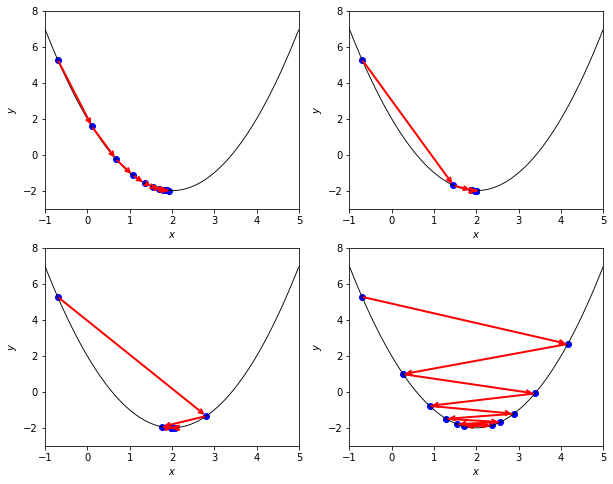

In [22]:
#Single-variable optimization 
import numpy as np
import matplotlib.pyplot as plt


def func_y(x):
    y = x**2-4*x+2
    return y

#def func_dif(x):
    #dif = 2*x - 4

def gradient_descent(x_0, eta, epoch): 
    x_gd = []
    y_gd = []
    x_gd.append(x_0)
    y_gd.append(func_y(x_0))
    
    for i in range(epoch):
        x_1 = x_0 - eta* (2*x_0 - 4)
        x_gd.append(x_1)
        y_gd.append(func_y(x_1))
        #update x
        x_0 = x_1
    return x_gd, y_gd

#initialization 
x_0 = -0.7
epoch = 10
temp = 221
fig = plt.figure(figsize=(10, 8))
def frange(p, q, jump):
  while p < q:
    yield p
    p += jump
for i, eta in zip(range(4), frange(0.15,0.95,0.25)):
    #function values
    x = np.arange(-1, 5, 0.01)
    y = func_y(x)
    plt.subplot(temp+i)
    plt.plot(x,y, lw = 0.9, color = 'k')
    plt.xlim([min(x),max(x)])
    plt.ylim([-3,max(y)+1])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    #gradient descent
    x_gd, y_gd = gradient_descent(x_0, eta, epoch)
    plt.scatter(x_gd, y_gd, c = 'b')
    for i in range(1, epoch+1):
        plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw':2},
                       va='center', ha='center')
plt.savefig('gradient_descent_learning_rate.eps', format='eps', dpi=1000)

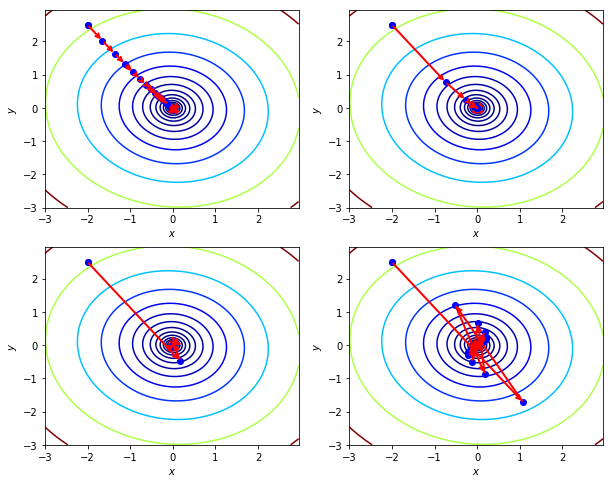

In [44]:
#multi-variable optimization 
from matplotlib import animation


def func_z(x,y):
    z = x**2/5. + x*y/50. + y**2/5.
    return z

def gradient_descent_mul(x_0, y_0, eta, epoch):
    x_gd = []
    y_gd = []
    z_gd = []
    
    x_gd.append(x_0)
    y_gd.append(y_0)
    z_gd.append(func_z(x_0,y_0))
    
    for i in range(epoch): 
        x_1 = x_0 - eta*2*(x_0/5. + y_0/50.)
        x_gd.append(x_0)
        
        y_1 = y_0 - eta*(x_0/50.+2*y_0/5.) 
        y_gd.append(y_0)
        
        z_gd.append(func_z(x_1,y_1))
        
        x_0 = x_1
        y_0 = y_1
        
    return x_gd, y_gd, z_gd


#initialize parameters
x_0 = -2
y_0 = 2.5
epoch = 15

temp = 221
fig = plt.figure(figsize=(10, 8))
def frange(p, q, jump):
  while p < q:
    yield p
    p += jump
for i, eta in zip(range(4), frange(0.5,7,1.3)):
    #function values
    a = np.arange(-3,3,.05)
    b = np.arange(-3,3,.05)
    x,y = np.meshgrid(a,b)
    z = func_z(x,y)
    plt.subplot(temp+i)
    plt.contour(x, y, z, levels=np.logspace(-3, 3, 25), cmap='jet')
    min_point = np.array([0.,0.])
    min_point_ = min_point[:,np.newaxis]
    plt.plot(*min_point_,func_z(*min_point_),'r X',markersize=10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    #run gradient descent
    x_gd, y_gd, z_gd = gradient_descent_mul(x_0, y_0, eta, epoch)
    plt.plot(x_gd, y_gd, 'bo')
    for i in range(1, epoch+1):
        plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw':2},
                       va='center', ha='center')
plt.savefig('multi_gradient_descent_learning_rate.eps', format='eps', dpi=1000)

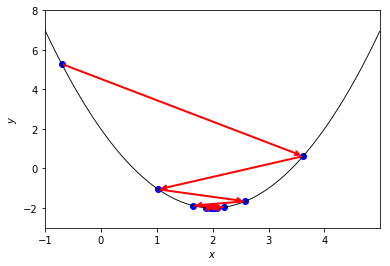

In [23]:
#function values
eta = .8
x = np.arange(-1, 5, 0.01)
y = func_y(x)
plt.plot(x,y, lw = 0.9, color = 'k')
plt.xlim([min(x),max(x)])
plt.ylim([-3,max(y)+1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
#gradient descent
x_gd, y_gd = gradient_descent(x_0, eta, epoch)
plt.scatter(x_gd, y_gd, c = 'b')
for i in range(1, epoch+1):
    plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw':2},
                       va='center', ha='center')
plt.savefig('gradient_descent.eps', format='eps', dpi=1000)

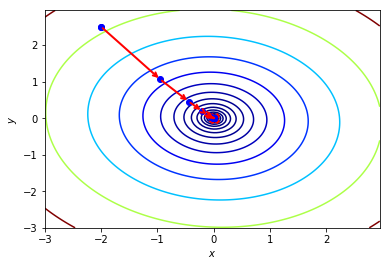

In [52]:
eta = 1.5
a = np.arange(-3,3,.05)
b = np.arange(-3,3,.05)
x,y = np.meshgrid(a,b)
z = func_z(x,y)
plt.contour(x, y, z, levels=np.logspace(-3, 3, 25), cmap='jet')
min_point = np.array([0.,0.])
min_point_ = min_point[:,np.newaxis]
plt.plot(*min_point_,func_z(*min_point_),'r X',markersize=10)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
#run gradient descent
x_gd, y_gd, z_gd = gradient_descent_mul(x_0, y_0, eta, epoch)
plt.plot(x_gd, y_gd, 'bo')
for i in range(1, epoch+1):
    plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw':2},
                       va='center', ha='center')
plt.savefig('multi_gradient_descent.eps', format='eps', dpi=1000)